XI 9.2 б)

In [70]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
 
set_matplotlib_formats ('png')

/tmp/ipykernel_7097/4294946217.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats ('png')


In [71]:
eps = 0.001
h = 0.001

In [72]:
a = 0
b = 1
y0_list = np.array([0.25, 0.5, 1, 1.5, 1.8, 1.9, 1.95])
y1 = 0

In [73]:
#                       0,1 
# du/dt = f(t, u) | u = y,z
def f(u):
    assert (u.size == 2)

    res = np.array ([u[1], (0.5 * u[1] ** 2) / (0.5 * u[0] -1)])

    return res

Метод Р-К 3 порядка

In [74]:
def solve(y0, tan_alpha):
    u_start = np.array([y0, tan_alpha])
    u = u_start

    res_u = [u_start]
    
    for x in np.arange(a + h, b + h, h):
        k1 = h * f (u)
        k2 = h * f (u + k1/2)
        k3 = h * f (u - k1 + 2*k2)
        u = u + (k1 + 4 * k2 + k3)/6
        res_u.append(u)

    return res_u

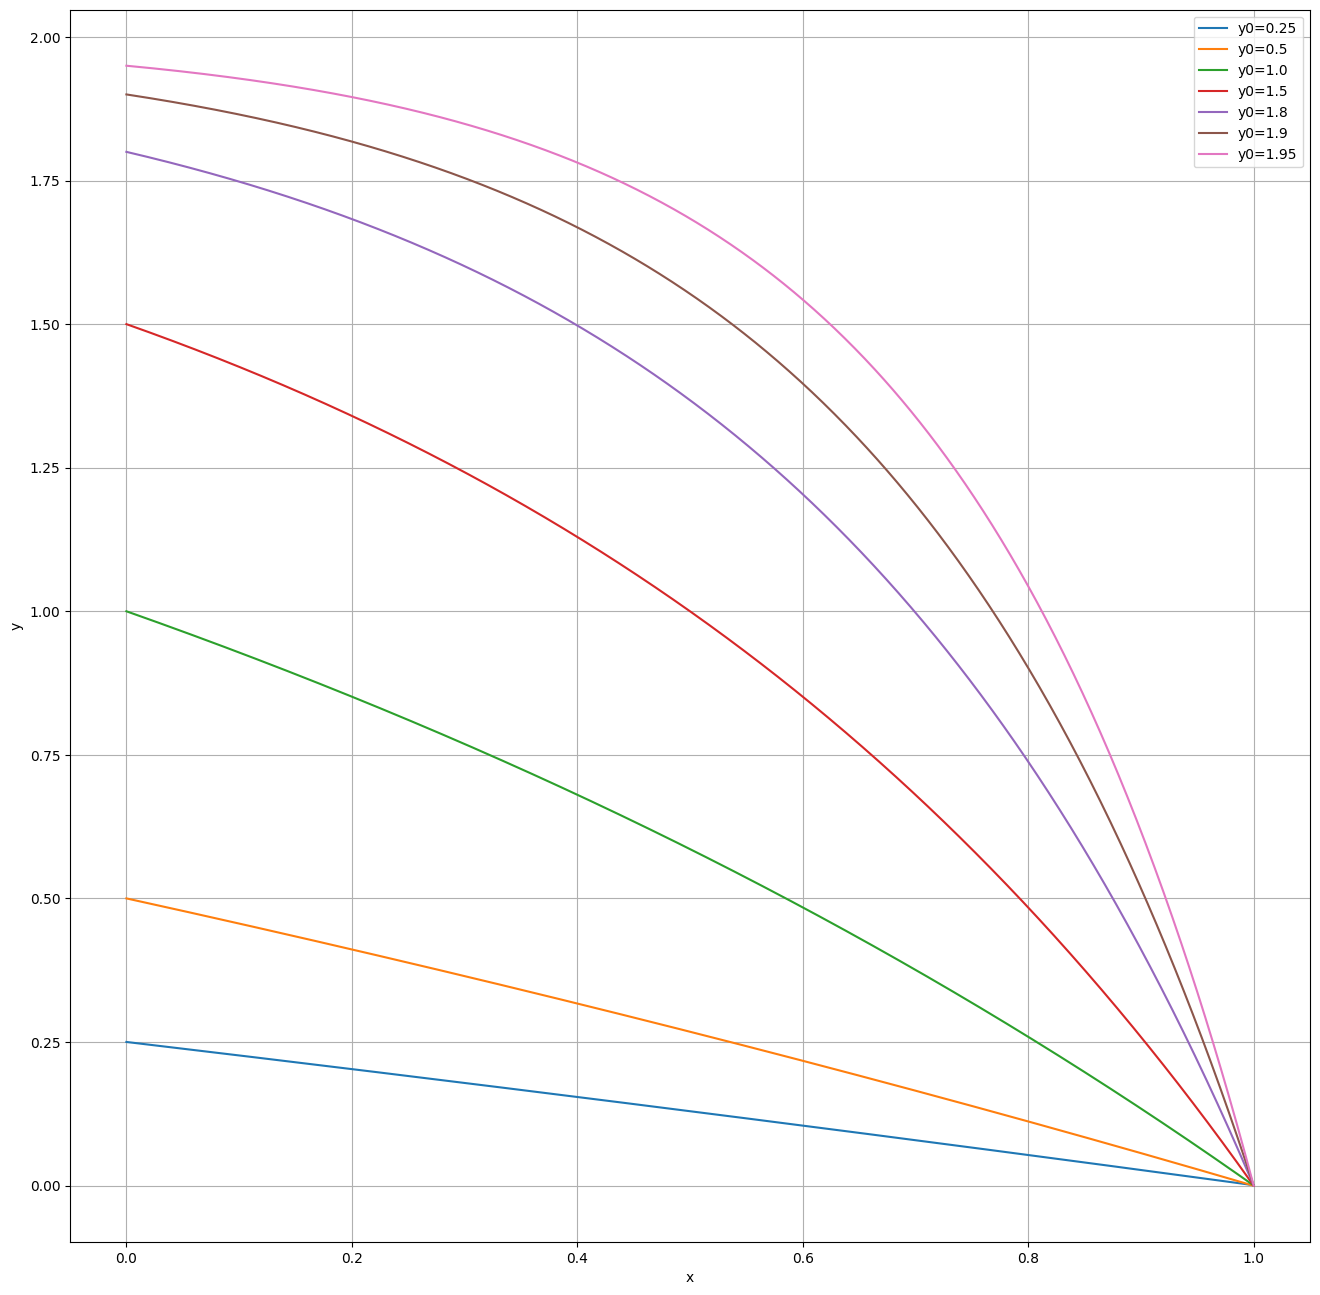

In [75]:
u_solutions = []
x = [i for i in np.arange(a, b + h, h)]

plt.figure(figsize=(16,16))
ax1 = plt.axes()
ax1.set_xlabel("x")
ax1.set_ylabel("y")

for y0 in y0_list:
    alpha0 = (y1 - y0) / (b - a)
    alpha1 = alpha0 / 2

    u0 = solve (y0, alpha0)
    u =  solve (y0, alpha1)

    while (abs (u[-1][0] - y1) > eps):
        tmp = alpha1
        alpha1 -= (u[-1][0] -y1) * (alpha1 - alpha0) / (u[-1][0] - u0[-1][0])
        alpha0 = tmp

        u0 = solve (y0, alpha0)
        u  = solve (y0, alpha1)

    y = [i[0] for i in u]
    ax1.plot(x, y, label=f"y0={y0}")

plt.grid()
plt.legend()
plt.savefig("picturies/graph1.png", dpi=100)
plt.show()